In [0]:
import tensorflow as tf
from tensorflow import keras

keras.__version__

'2.2.4-tf'

In [0]:
# Building an image classifier with the Sequential API:

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [0]:
print(X_train_full.shape)
X_train_full.dtype

(60000, 28, 28)


dtype('uint8')

In [0]:
# Create a validation set and scale the input features so they can be trained using 
#   Gradient Descent. Here we decrease the pixel intensity to 0-1 range by dividing by 255,
#   which also converts it to a float in the process.

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [0]:
class_names = ["Top", "Trousers", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Boot"]

In [0]:
class_names[y_train[0]]

'Coat'

In [0]:
# Actually building the classification Neural Network (MLP with 2 hidden layers):

# Create a Sequential model (simplest neural network; single stack connected sequentially):
model = keras.models.Sequential()
# Build the first layer and add it to the model; convert image into 1D array:
model.add(keras.layers.Flatten(input_shape=[28, 28]))
# Add a Dense hidden layer with 300 neurons
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
# Add a Dense output layer w/ 1 neuron per class, using softmax bc these classes are exclusive
model.add(keras.layers.Dense(10, activation="softmax"))

# You can also just pass a list of layers when creating the Sequential model like this:
# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation="relu"),
#     keras.layers.Dense(100, activation="relu"),
#     keras.layers.Dense(10, activation="softmax")
# ])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile the model:

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
# Using the Stochastic Gradient Descent optimizer causes Keras to perform the backpropagation algorithm as well

In [0]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 8s 153us/sample - loss: 0.7285 - accuracy: 0.7602 - val_loss: 0.5477 - val_accuracy: 0.8018
Epoch 2/30
55000/55000 [==============================] - 8s 140us/sample - loss: 0.4933 - accuracy: 0.8273 - val_loss: 0.4471 - val_accuracy: 0.8520
Epoch 3/30
55000/55000 [==============================] - 8s 147us/sample - loss: 0.4471 - accuracy: 0.8429 - val_loss: 0.4165 - val_accuracy: 0.8580
Epoch 4/30
55000/55000 [==============================] - 10s 178us/sample - loss: 0.4189 - accuracy: 0.8518 - val_loss: 0.4038 - val_accuracy: 0.8638
Epoch 5/30
55000/55000 [==============================] - 9s 162us/sample - loss: 0.3983 - accuracy: 0.8603 - val_loss: 0.3790 - val_accuracy: 0.8710
Epoch 6/30
55000/55000 [==============================] - 8s 142us/sample - loss: 0.3829 - accuracy: 0.8646 - val_loss: 0.3802 - val_accuracy: 0.8688
Epoch 7/30
55000/55000 [==========================

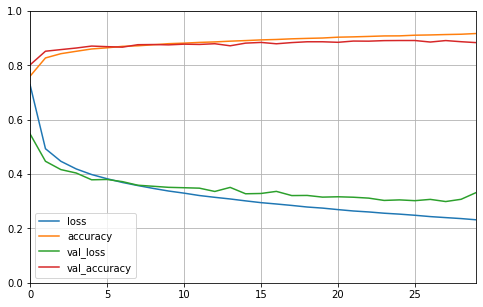

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [0]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.36858062280416487, 0.8726]

In [0]:
# Use the model to make predictions using its predict() method

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [0]:
import numpy as np

y_pred = model.predict_classes(X_new)
print(y_pred)
np.array(class_names)[y_pred]

[9 2 1]


array(['Boot', 'Pullover', 'Trousers'], dtype='<U8')

In [0]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

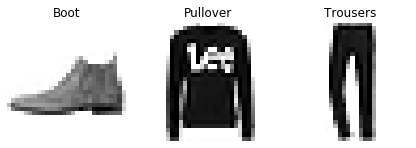

In [0]:


plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()



In [0]:
# Regression MLP: California housing dataset

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
model = keras.models.Sequential([
                                 keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
                                 keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizers=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 100us/sample - loss: 1.0469 - val_loss: 0.6059
Epoch 2/30
11610/11610 [==============================] - 1s 59us/sample - loss: 0.4754 - val_loss: 0.4752
Epoch 3/30
11610/11610 [==============================] - 1s 59us/sample - loss: 0.4223 - val_loss: 0.4563
Epoch 4/30
11610/11610 [==============================] - 1s 61us/sample - loss: 0.4096 - val_loss: 0.4459
Epoch 5/30
11610/11610 [==============================] - 1s 59us/sample - loss: 0.4016 - val_loss: 0.4483
Epoch 6/30
11610/11610 [==============================] - 1s 59us/sample - loss: 0.3942 - val_loss: 0.4415
Epoch 7/30
11610/11610 [==============================] - 1s 59us/sample - loss: 0.3875 - val_loss: 0.4494
Epoch 8/30
11610/11610 [==============================] - 1s 59us/sample - loss: 0.3844 - val_loss: 0.4471
Epoch 9/30
11610/11610 [==============================] - 1s 59us/sample - loss: 0.3824 - val_

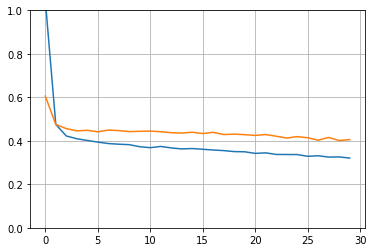

In [0]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [0]:
y_pred

array([[0.5414069],
       [1.7221028],
       [5.038067 ]], dtype=float32)

In [0]:
# Functional API: a more complex topology than Sequential

np.random.seed(42)
tf.random.set_seed(42)

In [0]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [0]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [0]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 111us/sample - loss: 1.2474 - val_loss: 0.6968
Epoch 2/20
11610/11610 [==============================] - 1s 65us/sample - loss: 0.6341 - val_loss: 0.6358
Epoch 3/20
11610/11610 [==============================] - 1s 61us/sample - loss: 0.5885 - val_loss: 0.5949
Epoch 4/20
11610/11610 [==============================] - 1s 63us/sample - loss: 0.5599 - val_loss: 0.5703
Epoch 5/20
11610/11610 [==============================] - 1s 63us/sample - loss: 0.5367 - val_loss: 0.5532
Epoch 6/20
11610/11610 [==============================] - 1s 64us/sample - loss: 0.5170 - val_loss: 0.5344
Epoch 7/20
11610/11610 [==============================] - 1s 63us/sample - loss: 0.5022 - val_loss: 0.5236
Epoch 8/20
11610/11610 [==============================] - 1s 65us/sample - loss: 0.4885 - val_loss: 0.5099
Epoch 9/20
11610/11610 [==============================] - 1s 68us/sample - loss: 0.4778 - val_

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
# Sending different subsets of input features through the wide/deep paths:

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [0]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# First 5 features to the wide path, 2-7 to the deep path:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 98us/sample - loss: 1.8095 - val_loss: 0.8101
Epoch 2/20
11610/11610 [==============================] - 1s 65us/sample - loss: 0.6798 - val_loss: 0.6453
Epoch 3/20
11610/11610 [==============================] - 1s 65us/sample - loss: 0.5957 - val_loss: 0.5978
Epoch 4/20
11610/11610 [==============================] - 1s 66us/sample - loss: 0.5580 - val_loss: 0.5669
Epoch 5/20
11610/11610 [==============================] - 1s 66us/sample - loss: 0.5331 - val_loss: 0.5504
Epoch 6/20
11610/11610 [==============================] - 1s 64us/sample - loss: 0.5124 - val_loss: 0.5346
Epoch 7/20
11610/11610 [==============================] - 1s 65us/sample - loss: 0.4972 - val_loss: 0.5254
Epoch 8/20
11610/11610 [==============================] - 1s 68us/sample - loss: 0.4834 - val_loss: 0.5157
Epoch 9/20
11610/11610 [==============================] - 1s 65us/sample - loss: 0.4746 - val_l

In [0]:
# Adding an auxiliary output for regularization:
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_ouput")(concat)
aux_output= keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs= [output, aux_output])

In [0]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 146us/sample - loss: 2.1329 - main_ouput_loss: 1.9166 - aux_output_loss: 4.0719 - val_loss: 1.0625 - val_main_ouput_loss: 0.8424 - val_aux_output_loss: 3.0415
Epoch 2/20
11610/11610 [==============================] - 1s 72us/sample - loss: 0.8910 - main_ouput_loss: 0.6989 - aux_output_loss: 2.6202 - val_loss: 0.8054 - val_main_ouput_loss: 0.6608 - val_aux_output_loss: 2.1058
Epoch 3/20
11610/11610 [==============================] - 1s 74us/sample - loss: 0.7397 - main_ouput_loss: 0.6064 - aux_output_loss: 1.9374 - val_loss: 0.7189 - val_main_ouput_loss: 0.6102 - val_aux_output_loss: 1.6960
Epoch 4/20
11610/11610 [==============================] - 1s 75us/sample - loss: 0.6746 - main_ouput_loss: 0.5684 - aux_output_loss: 1.6301 - val_loss: 0.6711 - val_main_ouput_loss: 0.5774 - val_aux_output_loss: 1.5137
Epoch 5/20
11610/11610 [==============================] - 1s 73us/sample -

In [0]:
total_loss, main_loass, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test]
)

y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
# The Subclassing API:

class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [0]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))

total_loss, main_loass, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 2s 138us/sample - loss: 2.2968 - output_1_loss: 2.1826 - output_2_loss: 3.3166 - val_loss: 1.1297 - val_output_1_loss: 0.9990 - val_output_2_loss: 2.3044
Epoch 2/10
11610/11610 [==============================] - 1s 68us/sample - loss: 0.9760 - output_1_loss: 0.8529 - output_2_loss: 2.0834 - val_loss: 0.8758 - val_output_1_loss: 0.7690 - val_output_2_loss: 1.8356
Epoch 3/10
11610/11610 [==============================] - 1s 71us/sample - loss: 0.8288 - output_1_loss: 0.7270 - output_2_loss: 1.7431 - val_loss: 0.7916 - val_output_1_loss: 0.6989 - val_output_2_loss: 1.6236
Epoch 4/10
11610/11610 [==============================] - 1s 72us/sample - loss: 0.7637 - output_1_loss: 0.6744 - output_2_loss: 1.5665 - val_loss: 0.7421 - val_output_1_loss: 0.6563 - val_output_2_loss: 1.5120
Epoch 5/10
11610/11610 [==============================] - 1s 71us/sample - loss: 0.7227 - output_1_loss: 0

In [0]:
# Saving and restoring

np.random.seed(42)
tf.random.set_seed(42)

In [0]:
model = keras.models.Sequential([
                                 keras.layers.Dense(30, activation="relu", input_shape=[8]),
                                 keras.layers.Dense(30, activation="relu"),
                                 keras.layers.Dense(1)
])

In [0]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 92us/sample - loss: 1.8631 - val_loss: 0.7804
Epoch 2/10
11610/11610 [==============================] - 1s 65us/sample - loss: 0.6723 - val_loss: 0.6186
Epoch 3/10
11610/11610 [==============================] - 1s 63us/sample - loss: 0.5927 - val_loss: 0.5829
Epoch 4/10
11610/11610 [==============================] - 1s 63us/sample - loss: 0.5550 - val_loss: 0.5511
Epoch 5/10
11610/11610 [==============================] - 1s 64us/sample - loss: 0.5278 - val_loss: 0.5357
Epoch 6/10
11610/11610 [==============================] - 1s 63us/sample - loss: 0.5032 - val_loss: 0.5102
Epoch 7/10
11610/11610 [==============================] - 1s 60us/sample - loss: 0.4863 - val_loss: 0.5011
Epoch 8/10
11610/11610 [==============================] - 1s 61us/sample - loss: 0.4701 - val_loss: 0.4869
Epoch 9/10
11610/11610 [==============================] - 1s 62us/sample - loss: 0.4586 - val_l

In [0]:
model.save("my_keras_model.h5")

In [0]:
model = keras.models.load_model("my_keras_model.h5")

In [0]:
model.predict(X_new)

array([[0.48175588],
       [1.680558  ],
       [3.1588087 ]], dtype=float32)

In [0]:
model.save_weights("my_keras_weights.ckpt")

In [0]:
model.load_weights("my_keras_weights.ckpt")

In [0]:
# Using callbacks during training:

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [0]:


model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])



In [0]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True) # That's pretty baller. NO WORRYING ABOUT OVERFITTING!!!!
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 94us/sample - loss: 1.8631 - val_loss: 0.7804
Epoch 2/10
11610/11610 [==============================] - 1s 65us/sample - loss: 0.6723 - val_loss: 0.6186
Epoch 3/10
11610/11610 [==============================] - 1s 61us/sample - loss: 0.5927 - val_loss: 0.5829
Epoch 4/10
11610/11610 [==============================] - 1s 63us/sample - loss: 0.5550 - val_loss: 0.5511
Epoch 5/10
11610/11610 [==============================] - 1s 66us/sample - loss: 0.5278 - val_loss: 0.5357
Epoch 6/10
11610/11610 [==============================] - 1s 65us/sample - loss: 0.5032 - val_loss: 0.5102
Epoch 7/10
11610/11610 [==============================] - 1s 62us/sample - loss: 0.4863 - val_loss: 0.5011
Epoch 8/10
11610/11610 [==============================] - 1s 65us/sample - loss: 0.4701 - val_loss: 0.4869
Epoch 9/10
11610/11610 [==============================] - 1s 65us/sample - loss: 0.4586 - val_l

In [0]:
# Even cooler than save_best_only: EarlyStopping callback
#   will LITERALLY do the early stopping for you. Damn.

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True) # Lol patience

history = model.fit(X_train, y_train, epochs=1000, # bc who cares!?
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/1000
11610/11610 [==============================] - 1s 79us/sample - loss: 0.4388 - val_loss: 0.4690
Epoch 2/1000
11610/11610 [==============================] - 1s 62us/sample - loss: 0.4319 - val_loss: 0.4616
Epoch 3/1000
11610/11610 [==============================] - 1s 64us/sample - loss: 0.4256 - val_loss: 0.4571
Epoch 4/1000
11610/11610 [==============================] - 1s 61us/sample - loss: 0.4202 - val_loss: 0.4523
Epoch 5/1000
11610/11610 [==============================] - 1s 63us/sample - loss: 0.4157 - val_loss: 0.4501
Epoch 6/1000
11610/11610 [==============================] - 1s 63us/sample - loss: 0.4112 - val_loss: 0.4468
Epoch 7/1000
11610/11610 [==============================] - 1s 62us/sample - loss: 0.4072 - val_loss: 0.4440
Epoch 8/1000
11610/11610 [==============================] - 1s 65us/sample - loss: 0.4040 - val_loss: 0.4421
Epoch 9/1000
11610/11610 [==============================] - 1s 64us/sample - lo

In [0]:
# For extra control, you can write your own callbacks. So cool.
#   This callback will display the ratio between the validation loass and the training loss during
#   training to detect overfitting:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

# You can also implement on_epoch_begin(), on_train_begin/end(), and on_batch_begin/end()

In [0]:
# Using TensorBoard for Visualization:

# To use TensorBoard, you must modify your program to output your data to binary log files called event files.
# - Each binary data record is called a summary.
# - You want to point the TensorBoard server to a root log directory and configure your program so it writes to a different subdir every time it runs so shit don't get mixed upp
#     Doo it like dis:

import os

root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
  import time
  run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
  return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()  # Den it b lookin lik: './my_logs/run_2020_01_23-13_00_53'

In [0]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
                                 keras.layers.Dense(30, activation="relu", input_shape=[8]),
                                 keras.layers.Dense(30, activation="relu"),
                                 keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [0]:
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback

tbc=TensorBoardColab()

Using TensorFlow backend.


Wait for 8 seconds...
TensorBoard link:
http://6286487a.ngrok.io


In [0]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
  File "/usr/local/lib/python3.6/dist-packages/tensorboard/main.py", line 59, in run_main
    default.get_plugins() + default.get_dynamic_plugins(),
  File "/usr/local/lib/python3.6/dist-packages/tensorboard/default.py", line 110, in get_dynamic_plugins
    for entry_point in pkg_resources.iter_entry_points('tensorboard_plugins')
  File "/usr/local/lib/python3.6/dist-packages/tensorboard/default.py", line 110, in <listcomp>
    for entry_point in pkg_resources.iter_entry_points('tensorboard_plugins')
  File "/usr/local/lib/python3.6/dist-packages/pkg_resources/__init__.py", line 2442, in load
    self.require(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/pkg_resources/__init__.py", line 2465, in require
    items = working_set.resolve(reqs, env, installer, extras=self.extras)
  Fil

In [0]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

In [0]:
# I'm not touching ^ that dumpster fire that is TensorBoardColab.. cherry on top: CACI is blocking ngrok. Cool.

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation="relu"))
  model.add(keras.layers.Dense(1))
  optimizer = keras.optimizers.SGD(lr= learning_rate)
  model.compile(loss="mse", optimizer=optimizer)
  return model

In [0]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [0]:
keras_reg.fit(X_train, y_train, epochs=1000,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 11610 samples, validate on 3870 samples
Epoch 1/1000
11610/11610 [==============================] - 1s 91us/sample - loss: 1.1815 - val_loss: 0.8399
Epoch 2/1000
11610/11610 [==============================] - 1s 62us/sample - loss: 0.7013 - val_loss: 0.5716
Epoch 3/1000
11610/11610 [==============================] - 1s 63us/sample - loss: 0.5197 - val_loss: 0.5273
Epoch 4/1000
11610/11610 [==============================] - 1s 62us/sample - loss: 0.4811 - val_loss: 0.4968
Epoch 5/1000
11610/11610 [==============================] - 1s 64us/sample - loss: 0.4565 - val_loss: 0.4772
Epoch 6/1000
11610/11610 [==============================] - 1s 60us/sample - loss: 0.4393 - val_loss: 0.4698
Epoch 7/1000
11610/11610 [==============================] - 1s 61us/sample - loss: 0.4283 - val_loss: 0.4600
Epoch 8/1000
11610/11610 [==============================] - 1s 63us/sample - loss: 0.4205 - val_loss: 0.4565
Epoch 9/1000
11610/11610 [==============================] - 1s 60us/sample - lo

In [0]:
mse_test = keras_reg.score(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
y_pred = keras_reg.predict(X_new)
print(y_pred)

[0.5730425 1.6791551 4.7832384]


In [0]:
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 6),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=8,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=3)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.001683454924600351, n_hidden=0, n_neurons=3 .....
Train on 7740 samples, validate on 3870 samples
Epoch 1/8


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


7740/7740 [==============================] - 1s 100us/sample - loss: 3.5564 - val_loss: 1.7789
Epoch 2/8
7740/7740 [==============================] - 0s 59us/sample - loss: 1.3350 - val_loss: 0.9102
Epoch 3/8
7740/7740 [==============================] - 0s 59us/sample - loss: 0.8579 - val_loss: 0.7093
Epoch 4/8
7740/7740 [==============================] - 0s 60us/sample - loss: 0.7340 - val_loss: 0.6500
Epoch 5/8
7740/7740 [==============================] - 0s 58us/sample - loss: 0.6951 - val_loss: 0.6280
Epoch 6/8
7740/7740 [==============================] - 0s 62us/sample - loss: 0.6682 - val_loss: 0.6096
Epoch 7/8
7740/7740 [==============================] - 0s 58us/sample - loss: 0.6526 - val_loss: 0.5968
Epoch 8/8
7740/7740 [==============================] - 0s 59us/sample - loss: 0.6386 - val_loss: 0.5892
3870/1 [=========================================================================================================================================================================

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s


Train on 7740 samples, validate on 3870 samples
Epoch 1/8
7740/7740 [==============================] - 1s 90us/sample - loss: 3.5557 - val_loss: 2.0175
Epoch 2/8
7740/7740 [==============================] - 0s 56us/sample - loss: 1.4772 - val_loss: 1.1382
Epoch 3/8
7740/7740 [==============================] - 0s 56us/sample - loss: 1.0155 - val_loss: 0.8994
Epoch 4/8
7740/7740 [==============================] - 0s 57us/sample - loss: 0.8734 - val_loss: 0.8008
Epoch 5/8
7740/7740 [==============================] - 0s 53us/sample - loss: 0.8032 - val_loss: 0.7461
Epoch 6/8
7740/7740 [==============================] - 0s 58us/sample - loss: 0.7550 - val_loss: 0.7113
Epoch 7/8
7740/7740 [==============================] - 0s 56us/sample - loss: 0.7167 - val_loss: 0.6895
Epoch 8/8
7740/7740 [==============================] - 0s 56us/sample - loss: 0.6855 - val_loss: 0.6760
3870/1 [================================================================================================================

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.1min finished


RuntimeError: ignored

In [0]:
rnd_search_cv.best_params_

In [0]:
rnd_search_cv.best_score_

In [0]:
rnd_search_cv.best_estimator_

In [0]:
rnd_search_cv.score(X_test, y_test)

In [0]:
model = rnd_search_cv.best_estimator_.model
model

In [0]:
model.evaluate(X_test, y_test)